In [24]:
import numpy as np
import pandas as pd

# Cargar el dataset desde Kaggle
data = pd.read_csv('credit_score.csv')

# Ver las primeras filas del dataset para entender sus características
print(data.head())

data

   Unnamed: 0  Month        Age  Occupation  Annual_Income  \
0           1      2  23.000000          13       19114.12   
1           2      6  34.429817          13       19114.12   
2           3      0  23.000000          13       19114.12   
3           4      7  23.000000          13       19114.12   
4           5      5  23.000000          13       19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0            4194.170850                3.0              4.0            3.0   
1            4194.170850                3.0              4.0            3.0   
2            4194.170850                3.0              4.0            3.0   
3            1824.843333                3.0              4.0            3.0   
4            4194.170850                3.0              4.0            3.0   

   Num_of_Loan  ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0          4.0  ...           1            809.98                 31.9449

,Unnamed: 0,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,2,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,...,1,809.98,31.944960,0,1,49.574949,118.280222,3,284.629162,2
1,2,6,34.429817,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,...,1,809.98,28.609352,267,1,49.574949,81.699521,4,331.209863,2
2,3,0,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,...,1,809.98,31.377862,268,1,49.574949,199.458074,5,223.451310,2
3,4,7,23.000000,13,19114.12,1824.843333,3.0,4.0,3.000000,4.0,...,1,809.98,24.797347,269,1,49.574949,41.420153,1,341.489231,2
4,5,5,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,...,1,809.98,27.262259,270,1,49.574949,62.430172,6,340.479212,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79800,99991,1,29.000000,1,20002.88,1929.906667,10.0,8.0,29.000000,5.0,...,0,3571.70,37.140784,75,2,60.964772,34.662906,0,337.362988,1
79801,99993,2,25.000000,9,39628.99,3359.415833,4.0,6.0,7.000000,2.0,...,1,502.38,29.135447,376,1,58638.000000,180.733095,4,400.104466,1
79802,99997,5,25.000000,9,39628.99,3359.415833,4.0,6.0,14.546679,2.0,...,1,502.38,41.255522,380,1,35.104023,24.028477,0,516.809083,0
79803,99998,4,25.000000,9,39628.99,3359.415833,4.0,6.0,7.000000,2.0,...,1,502.38,33.638208,381,1,35.104023,251.672582,3,319.164979,1


1.      Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.

Vamos a agregar algunas columnas relacionadas a la temática del dataset, como "Review" que podría ser una observación del cliente y "Is_Defaulted" que sería un indicador booleano.

In [25]:
# Eliminar la primera columna (ID)
data = data.drop(data.columns[0], axis=1)

# Crear un nuevo atributo de texto que describe el estado del puntaje crediticio
conditions = [
    (data['Credit_Score'] == 0),
    (data['Credit_Score'] == 1),
    (data['Credit_Score'] == 2)
]

#Caracteres P= Poor, S=Standard, G=Good
choices = ['P', 'S', 'G']
data['Credit_Description'] = np.select(conditions, choices, default='Unknown')

# Crear un atributo booleano indicando si el cliente ha tenido algún default en el pasado
data['Is_Defaulted'] = np.where(data['Num_of_Delayed_Payment'] > 0, True, False)

# Crear otro atributo de texto que describe el estado del ingreso
data['Income_Status'] = np.where(data['Annual_Income'] > 100000, 'High Income', 'Low Income')

# Ver los primeros registros con los nuevos atributos
#print(data.head())

data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Description,Is_Defaulted,Income_Status
0,2,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,0,1,49.574949,118.280222,3,284.629162,2,G,True,Low Income
1,6,34.429817,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,267,1,49.574949,81.699521,4,331.209863,2,G,True,Low Income
2,0,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,268,1,49.574949,199.458074,5,223.451310,2,G,True,Low Income
3,7,23.000000,13,19114.12,1824.843333,3.0,4.0,3.000000,4.0,128,...,269,1,49.574949,41.420153,1,341.489231,2,G,True,Low Income
4,5,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,270,1,49.574949,62.430172,6,340.479212,2,G,True,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79800,1,29.000000,1,20002.88,1929.906667,10.0,8.0,29.000000,5.0,4913,...,75,2,60.964772,34.662906,0,337.362988,1,S,True,Low Income
79801,2,25.000000,9,39628.99,3359.415833,4.0,6.0,7.000000,2.0,683,...,376,1,58638.000000,180.733095,4,400.104466,1,S,True,Low Income
79802,5,25.000000,9,39628.99,3359.415833,4.0,6.0,14.546679,2.0,683,...,380,1,35.104023,24.028477,0,516.809083,0,P,True,Low Income
79803,4,25.000000,9,39628.99,3359.415833,4.0,6.0,7.000000,2.0,683,...,381,1,35.104023,251.672582,3,319.164979,1,S,True,Low Income


2.      Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.

Duplicamos los ejemplos del dataset y añadimos ligeros ruidos en las características numéricas para que haya consistencia.

In [26]:
# Identificar columnas numéricas enteras y flotantes por separado
int_columns = data.select_dtypes(include=['int64']).columns
float_columns = data.select_dtypes(include=['float64']).columns

# Duplicar el dataset agregando un pequeño ruido a los valores flotantes
X_numerico = data[float_columns].values
X_numerico_con_ruido = X_numerico + np.random.uniform(-0.1, 0.1, X_numerico.shape)

# Crear el dataset duplicado
duplicated_data = pd.concat([data, data.copy()], ignore_index=True)

# Asignar los valores con ruido a las columnas flotantes del dataset duplicado
duplicated_data.loc[data.shape[0]:, float_columns] = X_numerico_con_ruido

# Mantener los valores originales para las columnas enteras (sin agregar ruido)
duplicated_data.loc[data.shape[0]:, int_columns] = data[int_columns].values

# Ver las primeras filas del dataset duplicado
#print(duplicated_data.head())
print(f"Tamaño del dataset original: {data.shape}")
print(f"Tamaño del dataset duplicado: {duplicated_data.shape}")

duplicated_data

Tamaño del dataset original: (79805, 27)
Tamaño del dataset duplicado: (159610, 27)


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Description,Is_Defaulted,Income_Status
0,2,23.000000,13,19114.120000,4194.170850,3.000000,4.000000,3.000000,4.000000,128,...,0,1,49.574949,118.280222,3,284.629162,2,G,True,Low Income
1,6,34.429817,13,19114.120000,4194.170850,3.000000,4.000000,3.000000,4.000000,128,...,267,1,49.574949,81.699521,4,331.209863,2,G,True,Low Income
2,0,23.000000,13,19114.120000,4194.170850,3.000000,4.000000,3.000000,4.000000,128,...,268,1,49.574949,199.458074,5,223.451310,2,G,True,Low Income
3,7,23.000000,13,19114.120000,1824.843333,3.000000,4.000000,3.000000,4.000000,128,...,269,1,49.574949,41.420153,1,341.489231,2,G,True,Low Income
4,5,23.000000,13,19114.120000,4194.170850,3.000000,4.000000,3.000000,4.000000,128,...,270,1,49.574949,62.430172,6,340.479212,2,G,True,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159605,1,29.099039,1,20002.883697,1929.969659,10.055047,7.933684,28.986280,4.980513,4913,...,75,2,60.892465,34.681480,0,337.401861,1,S,True,Low Income
159606,2,25.048744,9,39629.026563,3359.475619,4.069252,5.987317,6.980073,2.042544,683,...,376,1,58638.064464,180.774614,4,400.090511,1,S,True,Low Income
159607,5,25.078558,9,39628.927334,3359.462788,3.910275,6.031762,14.560379,2.003631,683,...,380,1,35.008975,23.947647,0,516.845762,0,P,True,Low Income
159608,4,24.956598,9,39629.052773,3359.480291,3.928726,5.965782,7.095437,2.003975,683,...,381,1,35.193084,251.735590,3,319.191880,1,S,True,Low Income


3.      Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado.


Podemos usar gráficos de dispersión o histogramas para visualizar las distribuciones de los datos antes y después de la duplicación.

<Figure size 800x600 with 0 Axes>

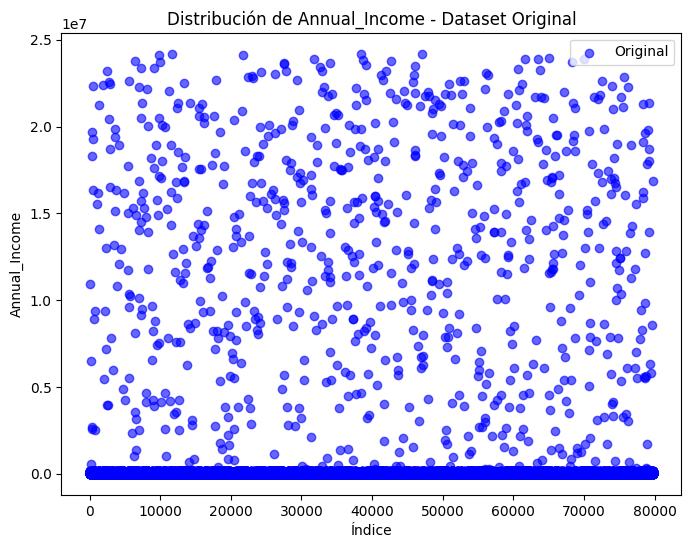

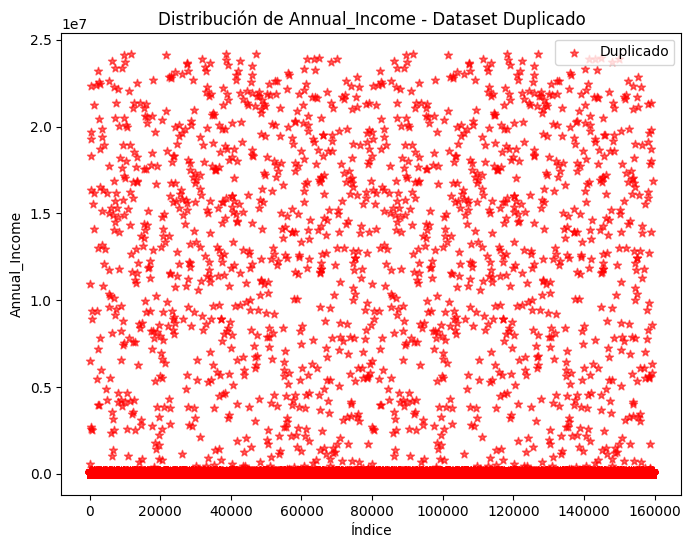

In [27]:
import matplotlib.pyplot as plt

# Seleccionar una columna numérica (puedes cambiar 'columna_numerica' por el nombre de tu columna)
columna_numerica = 'Annual_Income'  # Ejemplo, selecciona la columna que quieras comparar

# Crear una figura
plt.figure(figsize=(8, 6))
# Gráfica del dataset original
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[columna_numerica], marker='o', color='blue', label='Original', alpha=0.6)
plt.title(f'Distribución de {columna_numerica} - Dataset Original')
plt.xlabel('Índice')
plt.ylabel(columna_numerica)
plt.legend()
plt.show()

# Gráfica del dataset duplicado
plt.figure(figsize=(8, 6))
plt.scatter(duplicated_data.index, duplicated_data[columna_numerica], marker='*', color='red', label='Duplicado', alpha=0.6)
plt.title(f'Distribución de {columna_numerica} - Dataset Duplicado')
plt.xlabel('Índice')
plt.ylabel(columna_numerica)
plt.legend()
plt.show()

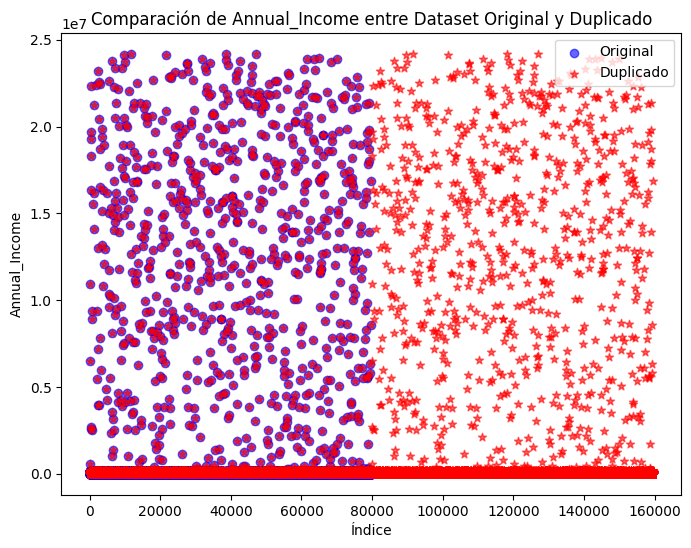

In [28]:
import matplotlib.pyplot as plt

# Seleccionar una columna numérica (puedes cambiar 'columna_numerica' por el nombre de tu columna)
columna_numerica = 'Annual_Income'  # Ejemplo, selecciona la columna que quieras comparar

# Crear una figura
plt.figure(figsize=(8, 6))

# Graficar los puntos del dataset original
plt.scatter(data.index, data[columna_numerica], marker='o', color='blue', label='Original', alpha=0.6)

# Graficar las estrellas del dataset duplicado
plt.scatter(duplicated_data.index, duplicated_data[columna_numerica], marker='*', color='red', label='Duplicado', alpha=0.6)

# Añadir títulos y leyendas
plt.title(f'Comparación de {columna_numerica} entre Dataset Original y Duplicado')
plt.xlabel('Índice')
plt.ylabel(columna_numerica)
plt.legend()

# Mostrar la gráfica
plt.show()

4.      Dividir los datos del dataset sintético en datos de entrenamiento y prueba

In [29]:
# Ahora puedes proceder con el conjunto duplicado numérico
# Por ejemplo, dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split

#creamos una variable temporal que contentra toda la columna de 'Credit_Score'
y_temp =duplicated_data['Credit_Score']

# Para la clase 0

#donde y_temp es igual a 0, separamos los datos en train_class_0, test_class_0
data_class_0 = duplicated_data[y_temp == 0]
train_class_0, test_class_0 = train_test_split(data_class_0, test_size=0.2, random_state=42)

# Para la clase 1

#donde y_temp es igual a 1, separamos los datos en train_class_1, test_class_1
data_class_1 = duplicated_data[y_temp == 1]
train_class_1, test_class_1 = train_test_split(data_class_1, test_size=0.2, random_state=42)

# Para la clase 2

#donde y_temp es igual a 2, separamos los datos en train_class_2, test_class_2
data_class_2 = duplicated_data[y_temp == 2]
train_class_2, test_class_2 = train_test_split(data_class_2, test_size=0.2, random_state=42)

In [30]:
print(f"Para la clase 0 tenemos una cantidad de: { data_class_0.shape[0]} donde el 80% es: {train_class_0.shape[0]} y el 20% es: {test_class_0.shape[0]}")
print(f"Para la clase 1 tenemos una cantidad de: { data_class_1.shape[0]} donde el 80% es: {train_class_1.shape[0]} y el 20% es: {test_class_1.shape[0]}")
print(f"Para la clase 2 tenemos una cantidad de: { data_class_2.shape[0]} donde el 80% es: {train_class_2.shape[0]} y el 20% es: {test_class_2.shape[0]}")
print(f"La cantidad total de datos es: {duplicated_data.shape[0]}")

Para la clase 0 tenemos una cantidad de: 46258 donde el 80% es: 37006 y el 20% es: 9252
Para la clase 1 tenemos una cantidad de: 84940 donde el 80% es: 67952 y el 20% es: 16988
Para la clase 2 tenemos una cantidad de: 28412 donde el 80% es: 22729 y el 20% es: 5683
La cantidad total de datos es: 159610


Separamos cada uno en sus X_train, y_train, X_test y y_test respectivos:

In [31]:
#para la parte de entrenamiento, separamos las caracteristicas de la etiqueta

#ENTRENAMIENTO
#para la clase 0
X_train_class_0 = train_class_0.drop(['Credit_Score'], axis=1)
y_train_class_0 = train_class_0['Credit_Score']

#para la clase 1
X_train_class_1 = train_class_1.drop(['Credit_Score'], axis=1)
y_train_class_1 = train_class_1['Credit_Score']

#para la clase 2
X_train_class_2 = train_class_2.drop(['Credit_Score'], axis=1)
y_train_class_2 = train_class_2['Credit_Score']


#PRUEBAS
#ahora para la parte de pruebas, separamos las caracteristicas de la etiqueta
#para la clase 0
X_test_class_0 = test_class_0.drop(['Credit_Score'], axis=1)
y_test_class_0 = test_class_0['Credit_Score']

#para la clase 1
X_test_class_1 = test_class_1.drop(['Credit_Score'], axis=1)
y_test_class_1 = test_class_1['Credit_Score']

#para la clase 2
X_test_class_2 = test_class_2.drop(['Credit_Score'], axis=1)
y_test_class_2 = test_class_2['Credit_Score']

ahora unimos todos en una sola matriz para X y y: pero luego debemos mezclar los datos, haciendo uso de np.random.permutation(len(X)) genera un arreglo de índices permutados aleatoriamente. 
Luego, estos índices se usan para reorganizar tanto las características como las etiquetas de entrenamiento y prueba.

In [32]:
#separando los datos de entrenamiento y pruebas

#para los datos de entrenamiento
X_train = pd.concat([X_train_class_0, X_train_class_1, X_train_class_2]).values
y_train = pd.concat([y_train_class_0, y_train_class_1, y_train_class_2]).values


indices_train = np.random.permutation(len(X_train))
X_train = X_train[indices_train]
y_train = y_train[indices_train]
m_train = len(y_train)

#para los datos de pruebas
X_test = pd.concat([X_test_class_0, X_test_class_1, X_test_class_2]).values
y_test = pd.concat([y_test_class_0, y_test_class_1, y_test_class_2]).values

indices_test = np.random.permutation(len(X_test))
X_test = X_test[indices_test]
y_test = y_test[indices_test]
m_test = len(y_test)




In [33]:
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(X_train)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(X_test)))
print('La cantidad total de ejemplos es de: {:.0f} de ejemplos'.format( len(duplicated_data)))

 
El 80% de ejemplos para entrenamiento son la cantidad de: 127687 de ejemplos
El 20% de ejemplos para pruebas son la cantidad de: 31923 de ejemplos
La cantidad total de ejemplos es de: 159610 de ejemplos


5.      Entrenar el modelo utilizando varios modelos de regresión logística por separado, considerando el numero de clases que se vinculan al dataset elegido.

Preprocesamiento de datos convirtiendo las columnas añadidas del dataset sintético a valores numericos y o que se puedan usar para el calculo de las regresiones logisticas   


In [34]:
# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de costo de la regresión logística
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5  # Evitar log(0)
    cost = (-1/m) * (np.dot(y, np.log(h + epsilon)) + np.dot(1 - y, np.log(1 - h + epsilon)))
    return cost

# Gradiente de la función de costo
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []
    
    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

# Preparar los datos (agregar la columna de bias y convertir en numpy)
X_train = train_data.drop(['Credit_Score'], axis=1).values
y_train = train_data['Credit_Score'].values
X_test = test_data.drop(['Credit_Score'], axis=1).values
y_test = test_data['Credit_Score'].values

# Agregar una columna de 1s (bias) a los datos de entrada
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Número de clases en el dataset (3 clases: 0, 1, 2)
num_classes = 3

# Inicializar variables
m, n = X_train.shape
theta_all = np.zeros((num_classes, n))
alpha = 0.01
num_iters = 1000

# Entrenar un modelo de regresión logística por cada clase (One-vs-All)
for i in range(num_classes):
    print(f"Entrenando modelo para la clase {i}...")
    
    # Convertir la clasificación en formato One-vs-All (binario)
    y_train_binary = np.where(y_train == i, 1, 0)
    
    # Inicializar theta para la clase actual
    theta = np.zeros(n)
    
    # Aplicar gradiente descendente
    theta, cost_history = gradient_descent(X_train, y_train_binary, theta, alpha, num_iters)
    
    # Guardar el theta entrenado para esta clase
    theta_all[i] = theta

# Mostrar los thetas entrenados
print("Theta entrenado para cada clase (One-vs-All):")
print(theta_all)

NameError: name 'train_data' is not defined